In [1]:
pip install pyfirmata

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyfirmata #Importamos a biblioteca PyFirmata que realiza a comunicação entre Python e Arduino
import time #Importamos também a biblioteca padrão Time, com o objetivo de setar as pausas e marcações temporais entre as piscadas.

port = 'COM5' #Configuramos a porta como a porta COM4. Esta configuração deve ser alterada caso sua placa não se configure nesta porta.
board = pyfirmata.Arduino(port) #Criamos a variável board que realizará os comandos a partir daqui
 

In [83]:
from qiskit import*
from qiskit.circuit import*
from qiskit.visualization import*
import numpy as np



mcz_ = QuantumCircuit(3)
mcz_.h(-1)
mcz_.mcx([0,1],2)
mcz_.h(-1)

mcz = mcz_.to_instruction(label='Multi_controlZ')



diffuser = QuantumCircuit(2)
[diffuser.h(i) for i in range(2)]
[diffuser.x(i) for i in range(2)]
diffuser.cz(0,1)
[diffuser.x(i) for i in range(2)]
[diffuser.h(i) for i in range(2)]

diff = diffuser.to_instruction(label='diffuser')


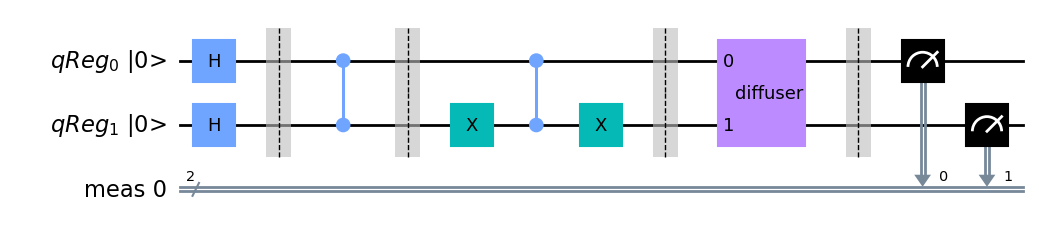

In [144]:
pinAzul = 8
pinVerde = 9
pinBranco = 10
pinAmarelo = 11

qBits = 2
N = 2**qBits
m = 1


t= int(np.floor(np.pi/4 * np.sqrt(N/m)))
qRegs = QuantumRegister(qBits,'qReg')
qc = QuantumCircuit(qRegs)

[qc.h(qRegs[i]) for i in range(qBits)]

for t_ in range(t):
    qc.barrier()
    qc.cz(0,1)


    qc.barrier()
    qc.x(qRegs[1])
    qc.cz(qRegs[0],qRegs[1])
    qc.x(qRegs[1])


    qc.barrier()


    qc.append(diff, [0,1])


qc.measure_all()
qc.draw('mpl',initial_state = True)




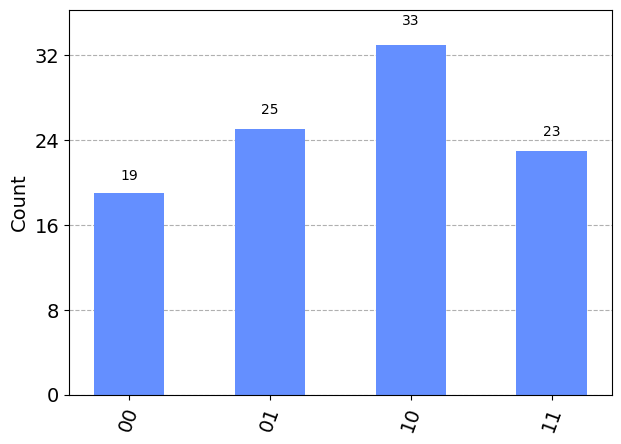

In [150]:

sim = Aer.get_backend("aer_simulator")
results = execute(qc, sim,shots=100).result().get_counts()

plot_histogram(results)

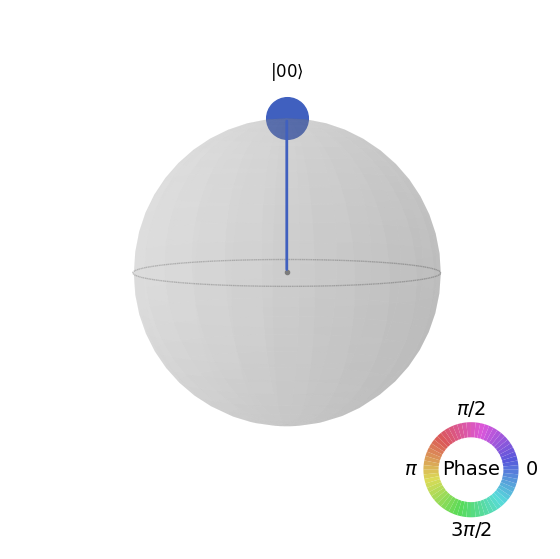

In [128]:
pinAzul = 8 #0001
pinVerde = 9 #0010
pinBranco = 10 #0100
pinAmarelo = 11 # 1000

np.identity(N)[int(list(results)[0],base=2)]




board.digital[pinAzul].write(int(np.identity(N)[int(list(results)[0],base=2)][0]))
board.digital[pinVerde].write(int(np.identity(N)[int(list(results)[0],base=2)][1]))
board.digital[pinBranco].write(int(np.identity(N)[int(list(results)[0],base=2)][2]))
board.digital[pinAmarelo].write(int(np.identity(N)[int(list(results)[0],base=2)][3]))





NameError: name 'board' is not defined

In [14]:
results = np.zeros(4)
for i in range(2):
    results = results + np.identity(N)[int(list(result)[i],base=2)]

In [41]:
board.digital[pinAzul].write(int(np.identity(N)[int(list(results))][0]))
board.digital[pinVerde].write(int(np.identity(N)[int(list(results))][1]))
board.digital[pinBranco].write(int(np.identity(N)[int(list(results))][2]))
board.digital[pinAmarelo].write(int(np.identity(N)[int(list(results))][3]))


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

1